# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [2]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. Zdefiniuję funkcję *spare_matrixAbt*, która zwróci:
- wektor $\mathbf{t}$ typu $m\times 1$ za pomocą komendy linspace tak aby wartości tego wektora należay do przedzaiłu $[0,1]$,
- wektor $\mathbf{b}$ typu $m \times 1$, którego wartości dane są funkcją $\cos(4t)$ oraz
- macierz $\mathbf{A}$ postaci: 
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
$$  
  
**Wskazówka**: Do definicji macierzy $\mathbf{A}$ należy użyć funkcji [vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html) oraz [fliplr](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fliplr.html).  
 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [3]:
#print(main.spare_matrix_Abt(50, 12))

In [16]:
from scipy.linalg import solve_triangular

A, b = main.spare_matrix_Abt(50, 12)

#Metoda 1
print('Metoda 1:')
A1, b1 = main.square_from_rectan(A, b)
x1 = np.linalg.solve(A1, b1)
print(main.residual_norm(A1, x1, b1))

#Metoda 2
print('Metoda 2:')
x2 = np.linalg.lstsq(A, b, rcond=1)[0]
print(main.residual_norm(A, x2, b))

#Metoda 3
print('Metoda 3:')
q, r = np.linalg.qr(A, mode='reduced')
x3 = sp.linalg.solve_triangular(r, q.T @ b)
print(main.residual_norm(r, x3, q.T @b))

#Metoda 4
print('Metoda 4:')

u, s, vh = np.linalg.svd(A, full_matrices=False)
S = np.diag(s)
c= vh.T @ np.linalg.solve(S, u.T @ b)
print(main.residual_norm(A, c, b))

Metoda 1:
3.145518701857381e-14
Metoda 2:
7.999154656712961e-09
Metoda 3:
1.023675029891333e-15
Metoda 4:
7.999155225137596e-09


In [5]:
%%timeit
#Metoda 1
#print('Metoda 1:')
A1, b1 = main.square_from_rectan(A, b)
x1 = np.linalg.solve(A1, b1)
(main.residual_norm(A1, x1, b1))

164 µs ± 6.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
%%timeit
#Metoda 2
#print('Metoda 2:')
x2 = np.linalg.lstsq(A, b, rcond=1)[0]
(main.residual_norm(A, x2, b))

99 µs ± 1.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
%%timeit
#Metoda 3
#print('Metoda 3:')
q, r = np.linalg.qr(A, mode='reduced')
x3 = sp.linalg.solve_triangular(r, q.T @ b)
(main.residual_norm(r, x3, q.T @b))

139 µs ± 2.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%%timeit
#print('Metoda 4:')
u, s, vh = np.linalg.svd(A, full_matrices=False)
S = np.diag(s)
c= vh.T @ np.linalg.solve(S, u.T @ b)
(main.residual_norm(A, c, b))

255 µs ± 8.88 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


***Zadanie 2***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

1:


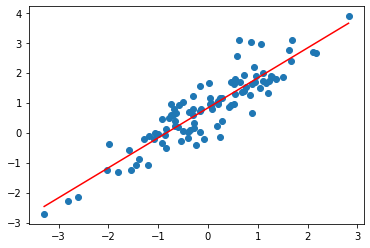

In [49]:
#Zad 5
#1)
print('1:')
q, r = np.linalg.qr(ad_1)
c = sp.linalg.solve_triangular(r, q.T @ y)
pred1=[min(x1), max(x1)]
y1 = c[0] + c[1] * pred1

plt.scatter(x1, y)
plt.plot(pred1, y1, 'r')

2:


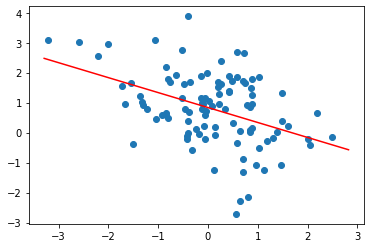

In [51]:

#2)
print('2:')
q, r = np.linalg.qr(ad_2)
c = sp.linalg.solve_triangular(r, q.T @ y)
pred2=[min(x1), max(x1)]
y2 = c[0] + c[1] * pred1

plt.scatter(x2, y)
plt.plot(pred1, y2, 'r')

In [ ]:

#3)
print('3:')


In [ ]:

#4)
print('4:')

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)